In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matrices for Different Models 

In [2]:

def getAandB(x,r,degree):
    if degree == 1 :
        A = np.array([
            [ x.size  , x.sum()     ],
            [ x.sum() , (x*x).sum() ]
        ])
        B = np.array([
            [ r.sum()     ],
            [ (r*x).sum() ]
        ])
        return A,B
    elif degree == 2 :
        A = np.array([
            [ x.size      , x.sum()       , (x*x).sum()     ],
            [ x.sum()     , (x*x).sum()   , (x*x*x).sum()   ],
            [ (x*x).sum() , (x*x*x).sum() , (x*x*x*x).sum() ]
        ])
        B = np.array([
            [ r.sum()       ],
            [ (r*x).sum()   ],
            [ (r*x*x).sum() ]
        ])
        return A,B
    else:
        A = np.array([
            [ x.size        , x.sum()         , (x*x).sum()       , (x*x*x).sum()       ],
            [ x.sum()       , (x*x).sum()     , (x*x*x).sum()     , (x*x*x*x).sum()     ],
            [ (x*x).sum()   , (x*x*x).sum()   , (x*x*x*x).sum()   , (x*x*x*x*x).sum()   ],
            [ (x*x*x).sum() , (x*x*x*x).sum() , (x*x*x*x*x).sum() , (x*x*x*x*x*x).sum() ]
        ])
        B = np.array([
            [ r.sum()        ],
            [ (r*x).sum()    ],
            [ (r*x*x).sum()  ],
            [ (r*x*x*x).sum()]
        ])
        return A,B       

# Predicted Values, Error and Plots

In [3]:
def test(x,r,ANS,degree):
    
    x_col = x.reshape(-1,1)
    r_col = r.reshape(-1,1)
    
    o = np.ones((x.size,1))
    temp = 1
    if degree == 1:
        temp = np.hstack((o,x_col))
    elif degree == 2:
        temp = np.hstack((o,x_col,(x*x).reshape(-1,1)))
    else:
        temp = np.hstack((o,x_col,(x*x).reshape(-1,1),(x*x*x).reshape(-1,1)))
        
    Y = np.dot(temp,ANS)
    
    plt.plot(x,r,'.',label='actual')
    plt.plot(x_col,Y,'.',label='predicted')
    plt.xlabel("x")
    plt.ylabel("r")
    plt.legend()
    
    error = ((r_col - Y)**2).mean(axis=0)
    print('Mean Square Error is ',error[0])
    
    plt.show()

# Driver Function

In [4]:
def go_with_degree(x,r,x_of_test,r_of_test,degree):
    
    A,B = getAandB(x,r,degree)

    A_INV = np.linalg.inv(A)

    ANS = np.dot(A_INV,B)
    
    print("ANS: ")
    print(ANS)
    
    print("Results on Training Set :")
    test(x,r,ANS,degree)

    print("Results on Testing Set :")
    test(x_of_test,r_of_test,ANS,degree)

# Globals

Training Data


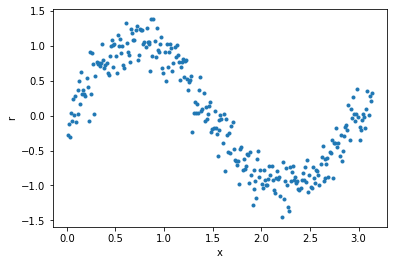

In [5]:
data = pd.read_csv('trainRegression.csv')
data_of_test = pd.read_csv('testRegression.csv')

x = data.values[:,0]
r = data.values[:,1]

x_of_test = data_of_test.values[:,0]
r_of_test = data_of_test.values[:,1]

x_col = x.reshape(-1,1)
r_col = r.reshape(-1,1)

print("Training Data")
plt.plot(x,r,'.')
plt.xlabel("x")
plt.ylabel("r")
plt.show()

# Linear Model

ANS: 
[[ 0.8736061 ]
 [-0.55251074]]
Results on Training Set :
Mean Square Error is  0.29907275382945003


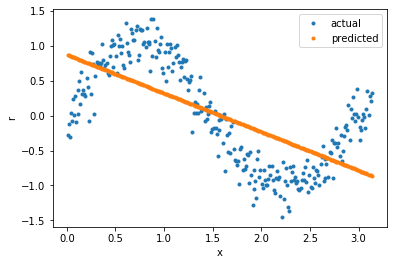

Results on Testing Set :
Mean Square Error is  0.3159321720459774


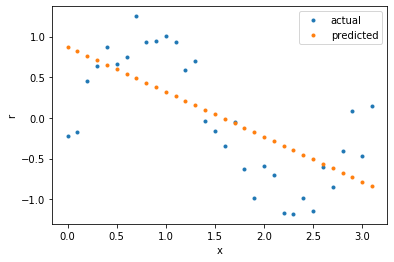

In [6]:
go_with_degree(x,r,x_of_test,r_of_test,1)

# Quadratic Model

ANS: 
[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]
Results on Training Set :
Mean Square Error is  0.2882705703732301


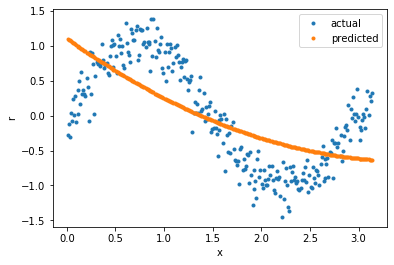

Results on Testing Set :
Mean Square Error is  0.3260417959496285


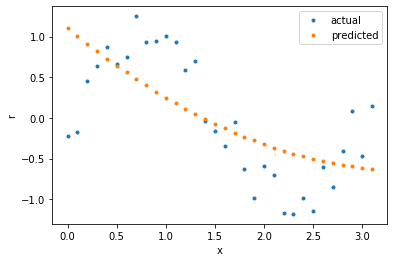

In [7]:
go_with_degree(x,r,x_of_test,r_of_test,2)

# Cubic Model

ANS: 
[[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]
Results on Training Set :
Mean Square Error is  0.049660255362215626


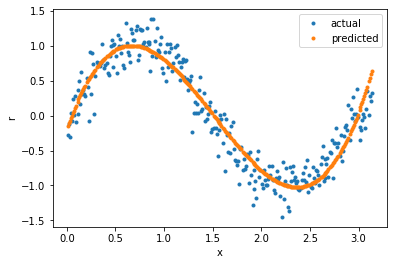

Results on Testing Set :
Mean Square Error is  0.05154205769095591


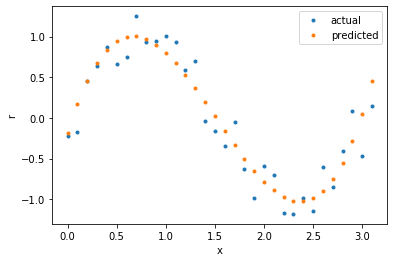

In [9]:
go_with_degree(x,r,x_of_test,r_of_test,3)

# Comments

Mean Square Errors for both linear and quadratic models were not close to zero (i.e. 0.288 <---> 0.326) as computed from the predicted values both for the training and testing datasets. We can easily visualize that the curves for both these models don't match the traning data. <br>
However, for the cubic model the curve matches and so does the predicted values resulting in a very minimal error of 0.05 for both training and testing datasets. So the cubic function for prediction y = - 0.18862637 + 3.94071895 x - 3.78251095 x^2 + 0.83166145 x^3 can be accepted.